# Solution: Manual calibration of an SIR model (part 2)

Now that we use the full dataset in the calibration, it is possible to identify values for $\beta$ and $\gamma$ that simulate the best match the data.

This is what the model fit looks like if $\beta$ = 1.7 and $\gamma$ = 0.45 days$^{-1}$:

Loading required package: deSolve
Loading required package: reshape2
Loading required package: ggplot2


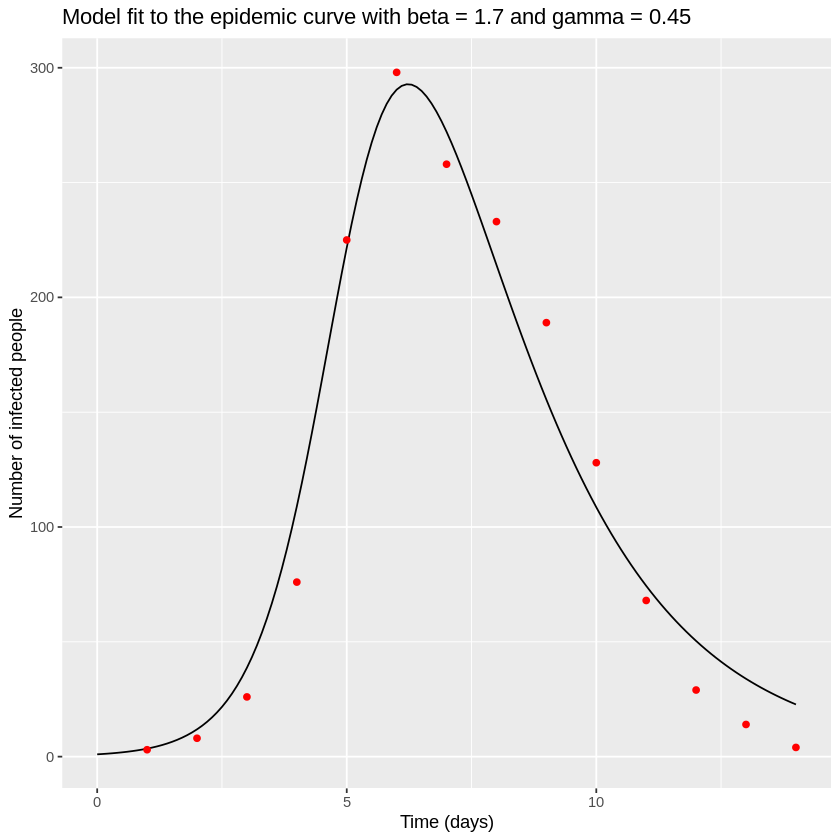

In [1]:
# The dataset
data <- read.csv("../GraphicsAndData/idm2_sir_data.csv")   # read in the data from a CSV file

# PACKAGES
require(deSolve)
require(reshape2)
require(ggplot2)

# INPUT
initial_state_values <- c(S = 762,  
                          I = 1,       
                          R = 0)

# Adding the parameters vector
parameters <- c(beta = 1.7,
                gamma = 0.45)

times <- seq(from = 0, to = 14, by = 0.1)

# MODEL FUNCTION
sir_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {
    
    N <- S+I+R
    
    lambda <- beta * I/N
    
    # The differential equations
    dS <- -lambda * S               
    dI <- lambda * S - gamma * I
    dR <- gamma * I             
    
    # Output
    return(list(c(dS, dI, dR))) 
  })
}


    
# MODEL OUTPUT

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# PLOT OF THE MODEL FIT

ggplot() +
  geom_line(data = output, aes(x = time, y = I)) +                               # plot the model prediction of the
                                                                                 # number infected as a line
  geom_point(data = data, aes(x = time, y = number_infected), colour = "red") +  # overlay the data as red dots
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = paste("Model fit to the epidemic curve with beta =", parameters["beta"], 
                     "and gamma =", parameters["gamma"]))

In [2]:
data

time,number_infected
1,3
2,8
3,26
4,76
5,225
6,298
7,258
8,233
9,189
10,128


Since this is real outbreak data, the datapoints don't neatly follow the SIR model prediction - they are for example influenced by measurement error. This means that we cannot match every single datapoint exactly, and there is some subjectivity involved in what the "best" fit looks like. For example, the model above matches the peak of the epidemic and the timing of growth and decline well, but it overestimates the number of infected people at the beginning and the end of the outbreak a little. Depending on what you consider the best visual fit, your parameter values might be slightly different to the ones presented here. Unlike the previous etivity, however, the values you find for $\beta$ and $\gamma$ should be roughly similar to the values that anyone else finds: in this etivity, there is sufficient data to fix unique values for both parameters.